<div class="alert alert-block alert-danger">
    
### Notes

</div>

### Nonlinear Regression, Numerical python, $ \ldots $.

***

$Exponential$ $Regression$

$\mathbf{y} = \beta_0 + \beta_1 exp(\mathbf{X}\mathbf{\beta_2}) + \mathbf{\epsilon}$

$\text{minimize } RSS(\beta_0, \beta_1, \beta_2) = \sum_{\forall_i} \hat{\epsilon_i}^2 = \sum_{\forall_i} (y_i - \hat{\beta_0} - \hat{\beta_1} exp(\hat{\beta_2} X_i))^2 $

$\frac{\partial RSS}{\partial \hat{\beta_0}} = -2 \sum_{\forall_i} (y_i - \hat{\beta_0} - \hat{\beta_1} exp(\hat{\beta_2} X_i)) $

$\frac{\partial RSS}{\partial \hat{\beta_1}} = -2 \sum_{\forall_i} (y_i - \hat{\beta_0} - \hat{\beta_1} exp(\hat{\beta_2} X_i)) exp(\hat{\beta_2 X_i}) $

$\frac{\partial RSS}{\partial \hat{\beta_1}} = -2 \sum_{\forall_i} (y_i - \hat{\beta_0} - \hat{\beta_1} exp(\hat{\beta_2} X_i)) \hat{\beta_2} exp(\hat{\beta_2 X_i}) $

***

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import scipy.optimize as optimize

In [3]:
np.random.seed(1234)

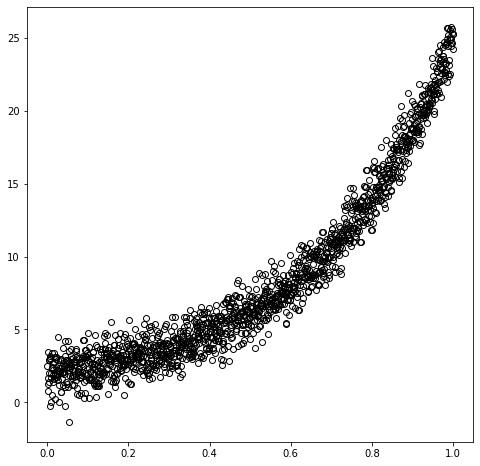

In [4]:
N = 1500
beta_0, beta_1, beta_2 = 0.8, 1.2, 3
x = np.linspace(0, 1, N)
e = np.random.randn(N)
y = beta_0 + beta_1 * np.exp(beta_2 * x) + e

plt.figure(figsize=(8,8))
plt.plot(x, y, linestyle = "None", marker = "o", color = "black", markerfacecolor = 'None');

In [5]:
def RSS(betas, y, x):
    y_hat = betas[0] + betas[1] * np.exp(betas[2] * x)
    return np.sum(np.square(y - y_hat))

In [6]:
opt_res = optimize.minimize(fun = RSS, x0 = [0, 0, 0], args = (y, x))
opt_res

      fun: 1459.135339728265
 hess_inv: array([[ 0.01679846, -0.00613779,  0.00452834],
       [-0.00613779,  0.00224339, -0.0016535 ],
       [ 0.00452834, -0.0016535 ,  0.00122331]])
      jac: array([-1.52587891e-05,  0.00000000e+00,  4.57763672e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 246
      nit: 28
     njev: 49
   status: 2
  success: False
        x: array([0.87948333, 1.16332784, 3.03175655])

***

$\mathbf{y} = \beta_0 exp(\mathbf{X}\mathbf{\beta_1}) + \mathbf{\epsilon}$

In [7]:
data = pd.read_csv('recovery.txt', delimiter='\t')
data.head()

,patient,days,prog
0,1,2,54
1,2,5,50
2,3,7,45
3,4,10,37
4,5,14,35


In [8]:
def two_parameters_model_rss(betas, y, x):
    y_hat = betas[0] * np.exp(betas[1] * x)
    return np.sum(np.square(y - y_hat))

opt_res = optimize.minimize(fun = two_parameters_model_rss, x0 = [0, 0], args = (data.loc[:, 'prog'], data.loc[:,'days']))
opt_res

      fun: 49.45929986271006
 hess_inv: array([[ 3.98628738e-02, -5.68956144e-05],
       [-5.68956144e-05,  4.08631472e-07]])
      jac: array([0.        , 0.00133944])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 85
      nit: 17
     njev: 21
   status: 2
  success: False
        x: array([ 5.86065755e+01, -3.95864677e-02])

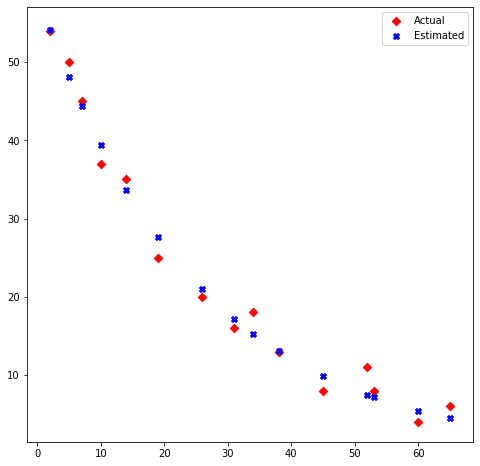

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(data.loc[:,'days'], data.loc[:,'prog'], marker='D', color='r', label='Actual')
plt.scatter(data.loc[:,'days'], opt_res.x[0]*np.exp(opt_res.x[1]*data.loc[:,'days']), marker='X', color='b', label='Estimated')
plt.legend(loc=0);